In [ ]:
! git clone https://github.com/SiddharthMaverick/DS_203_Project.git

Cloning into 'DS_203_Project'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 182 (delta 2), reused 180 (delta 0), pack-reused 0
Receiving objects: 100% (182/182), 1.28 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd DS_203_Project

/content/DS_203_Project


In [ ]:
import numpy as np
import pandas as pd
import os
import re
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN  # Import DBSCAN
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


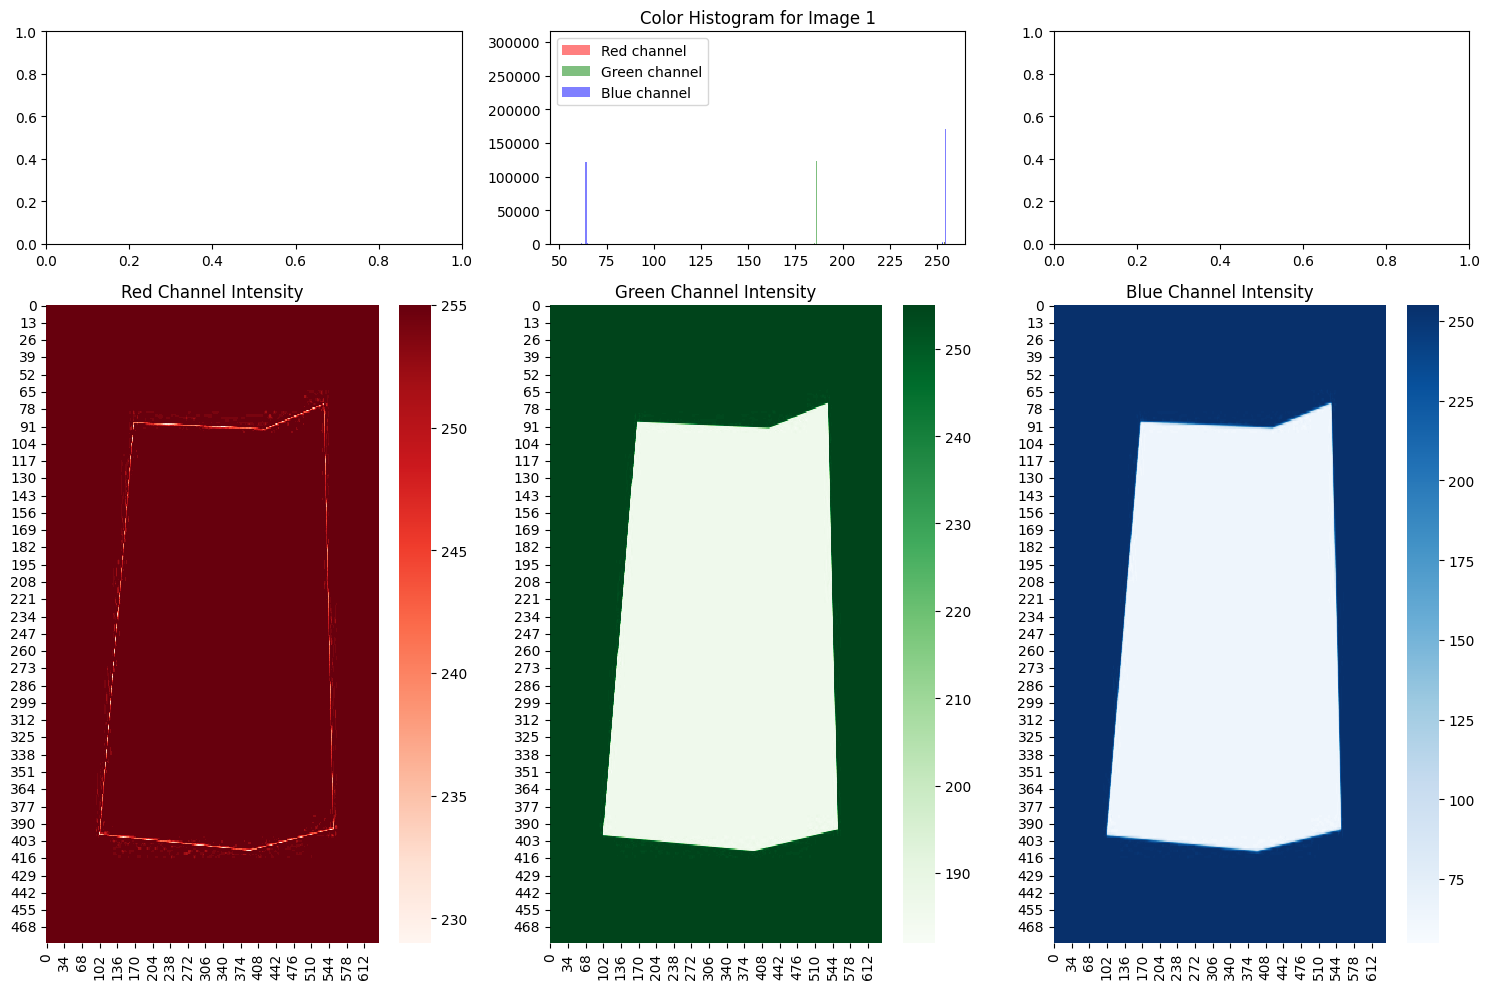

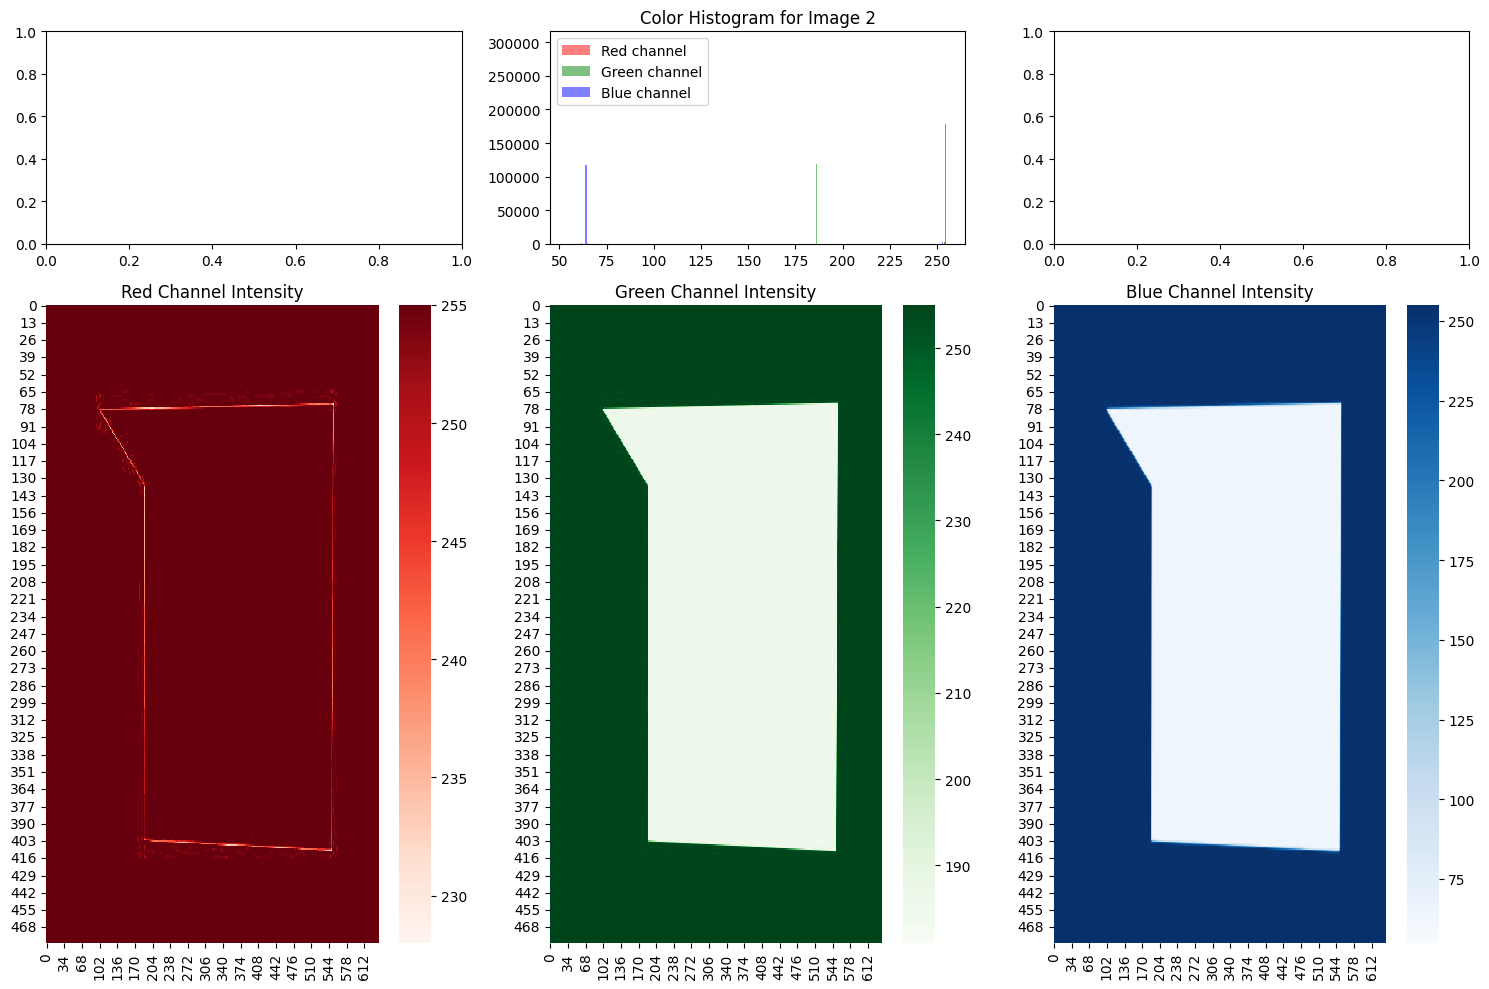

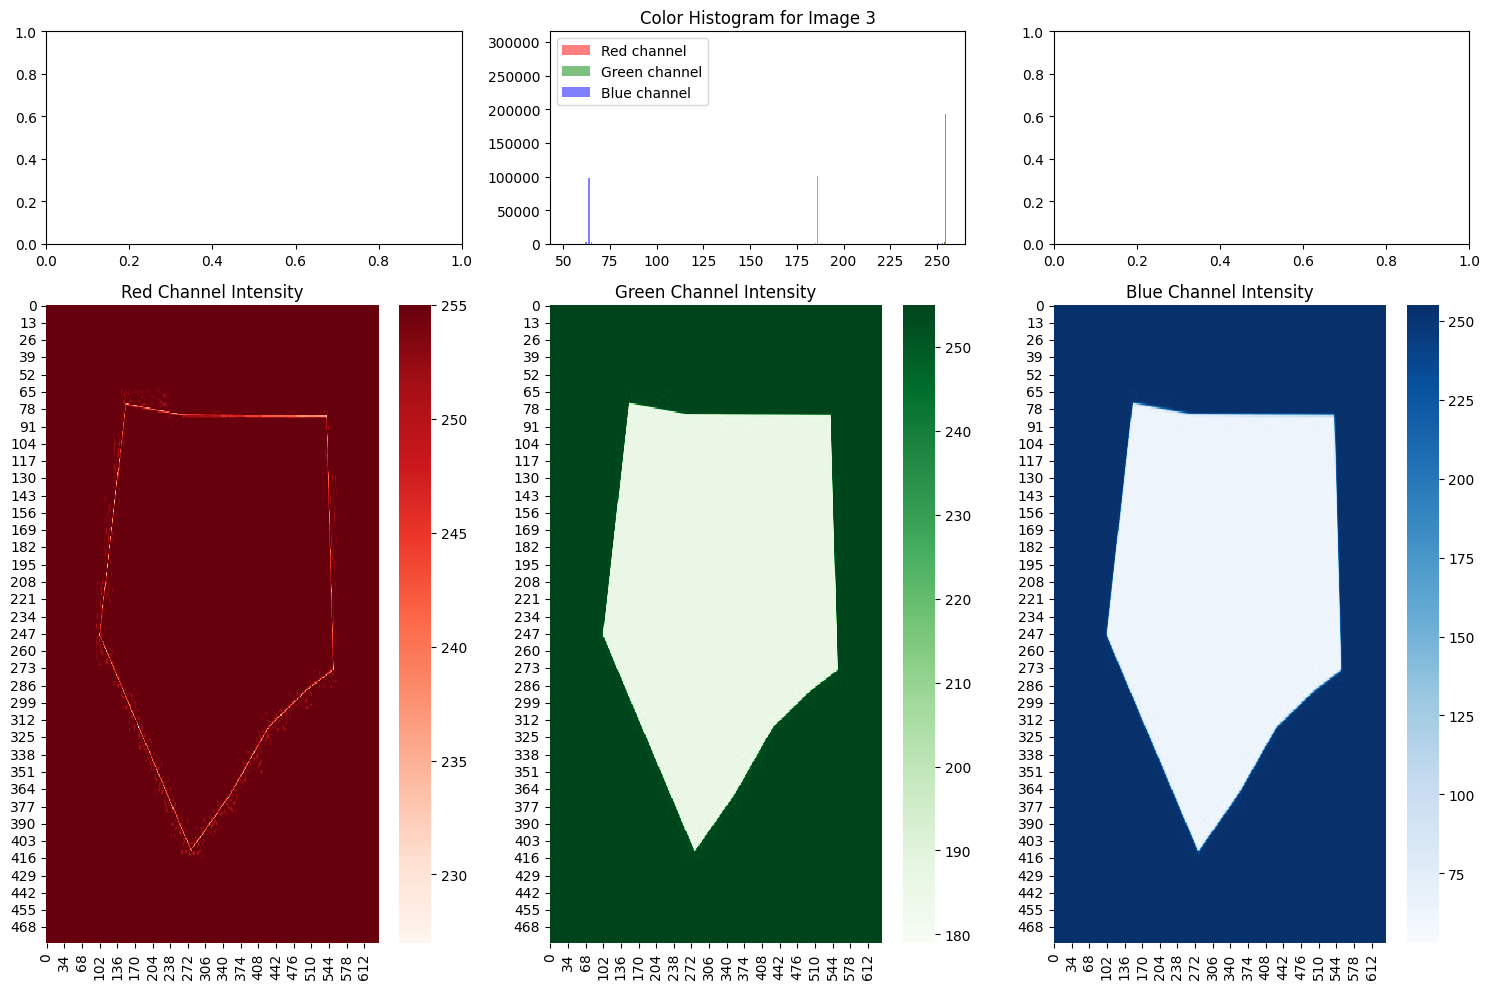

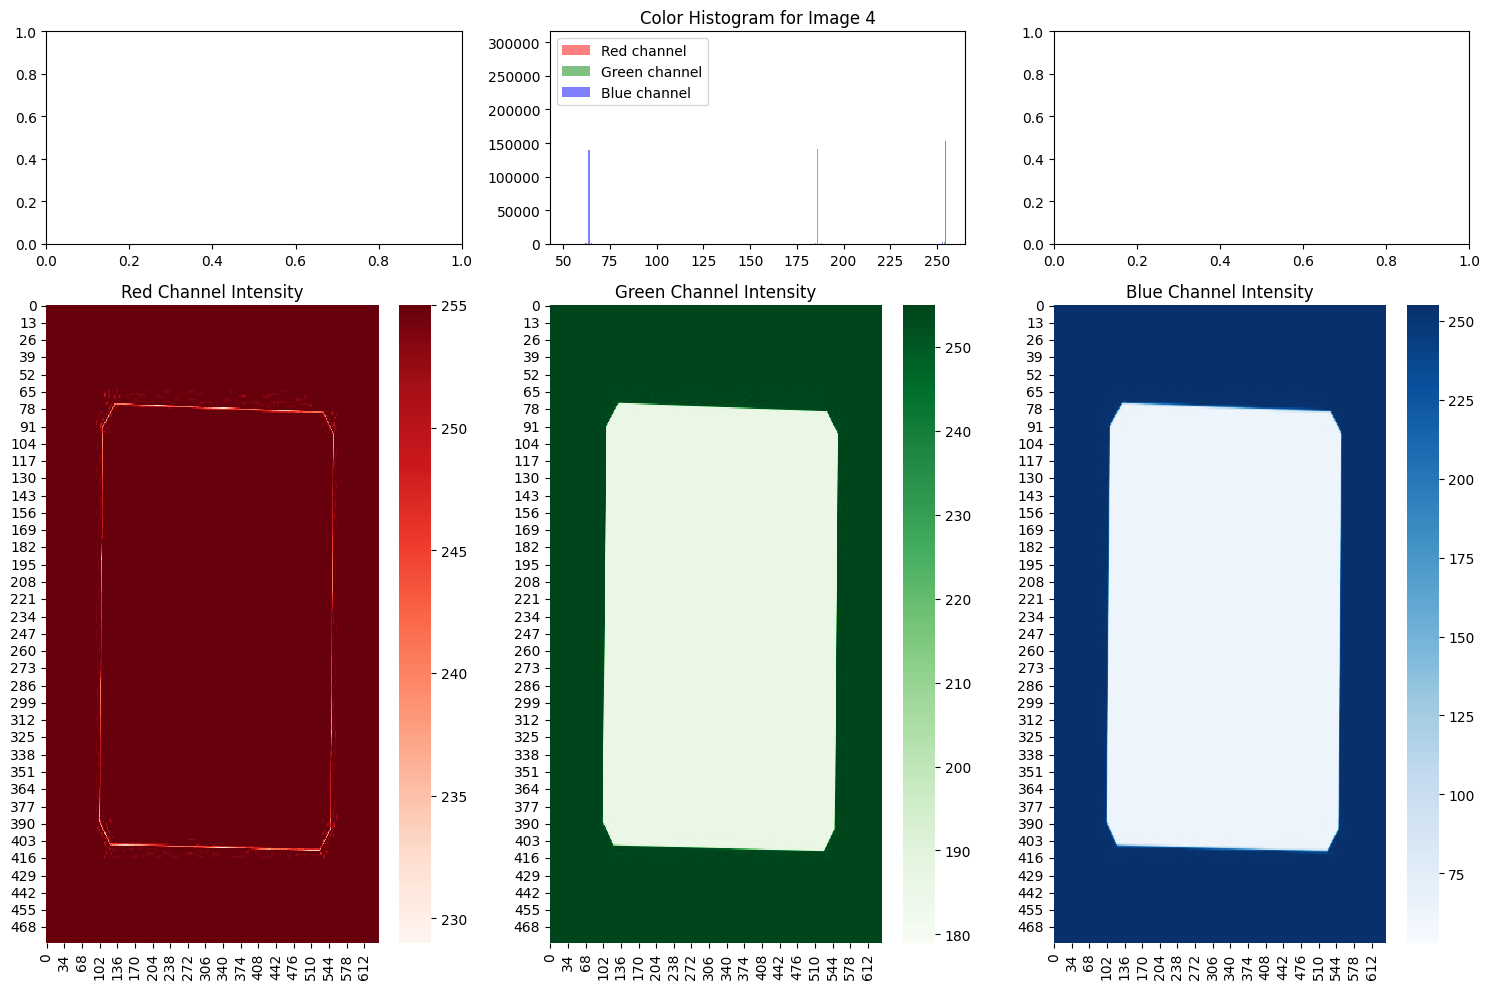

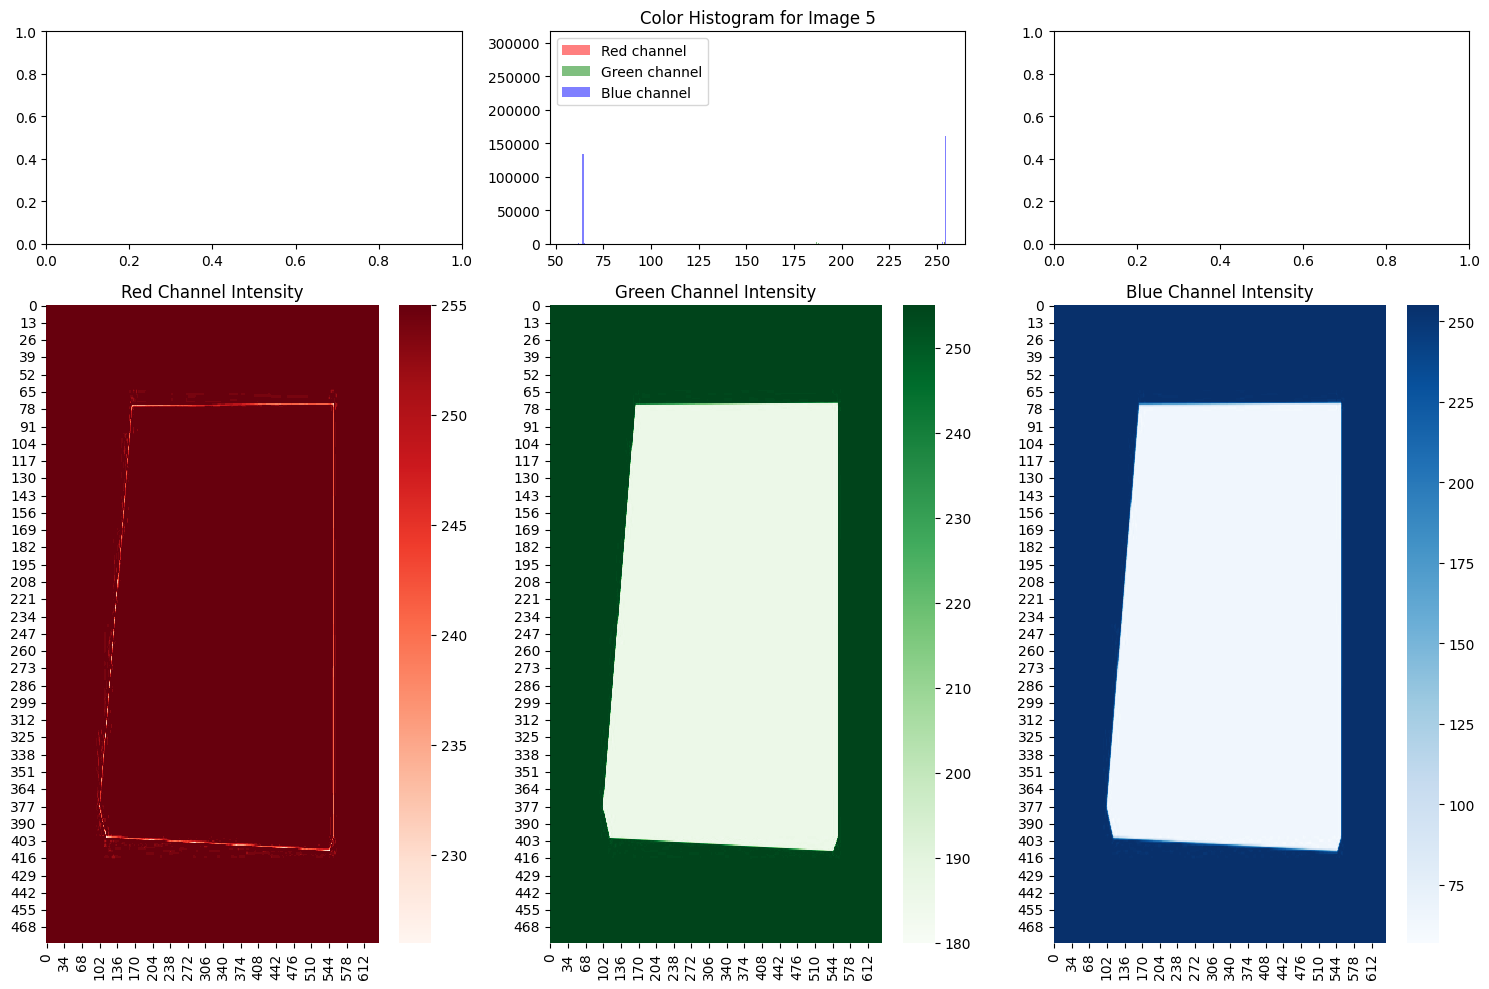

In [ ]:

def load_first_n_images(folder, n=5):
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if i >= n:
            break
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def plot_color_histogram(image, ax, title):
    # Convert image to RGB if not already in that format
    image = image.convert('RGB')
    color_data = np.array(image)

    # Flatten the arrays
    r = color_data[:, :, 0].flatten()
    g = color_data[:, :, 1].flatten()
    b = color_data[:, :, 2].flatten()

    # Plot histogram on the specified axes
    ax.hist(r, bins=256, color='red', alpha=0.5, label='Red channel')
    ax.hist(g, bins=256, color='green', alpha=0.5, label='Green channel')
    ax.hist(b, bins=256, color='blue', alpha=0.5, label='Blue channel')
    ax.set_title(title)
    ax.legend()

def plot_color_heatmap(image, axs):
    # Convert image to RGB if not already in that format
    image = image.convert('RGB')
    color_data = np.array(image)

    sns.heatmap(color_data[:, :, 0], ax=axs[0], cmap='Reds')
    axs[0].set_title('Red Channel Intensity')
    sns.heatmap(color_data[:, :, 1], ax=axs[1], cmap='Greens')
    axs[1].set_title('Green Channel Intensity')
    sns.heatmap(color_data[:, :, 2], ax=axs[2], cmap='Blues')
    axs[2].set_title('Blue Channel Intensity')

def main():
    folder_path = 'dataset'
    images = load_first_n_images(folder_path, 5)

    # Plotting histograms and heatmaps
    for idx, img in enumerate(images):
        fig, axs = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 3]})
        plot_color_histogram(img, axs[0, 1], f"Color Histogram for Image {idx+1}")
        plot_color_heatmap(img, axs[1, :])
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()


Number of components to explain 95.0% of variance: 51


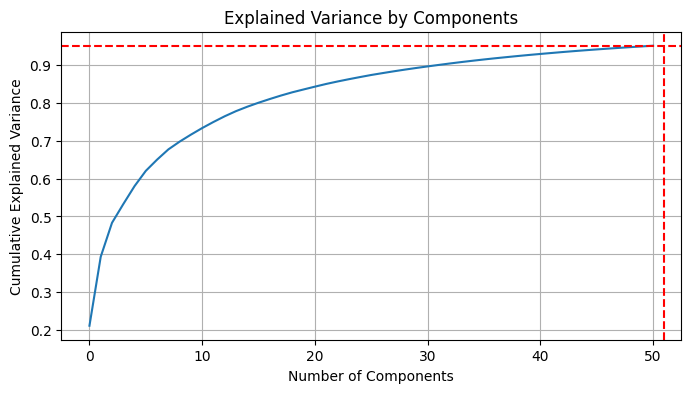

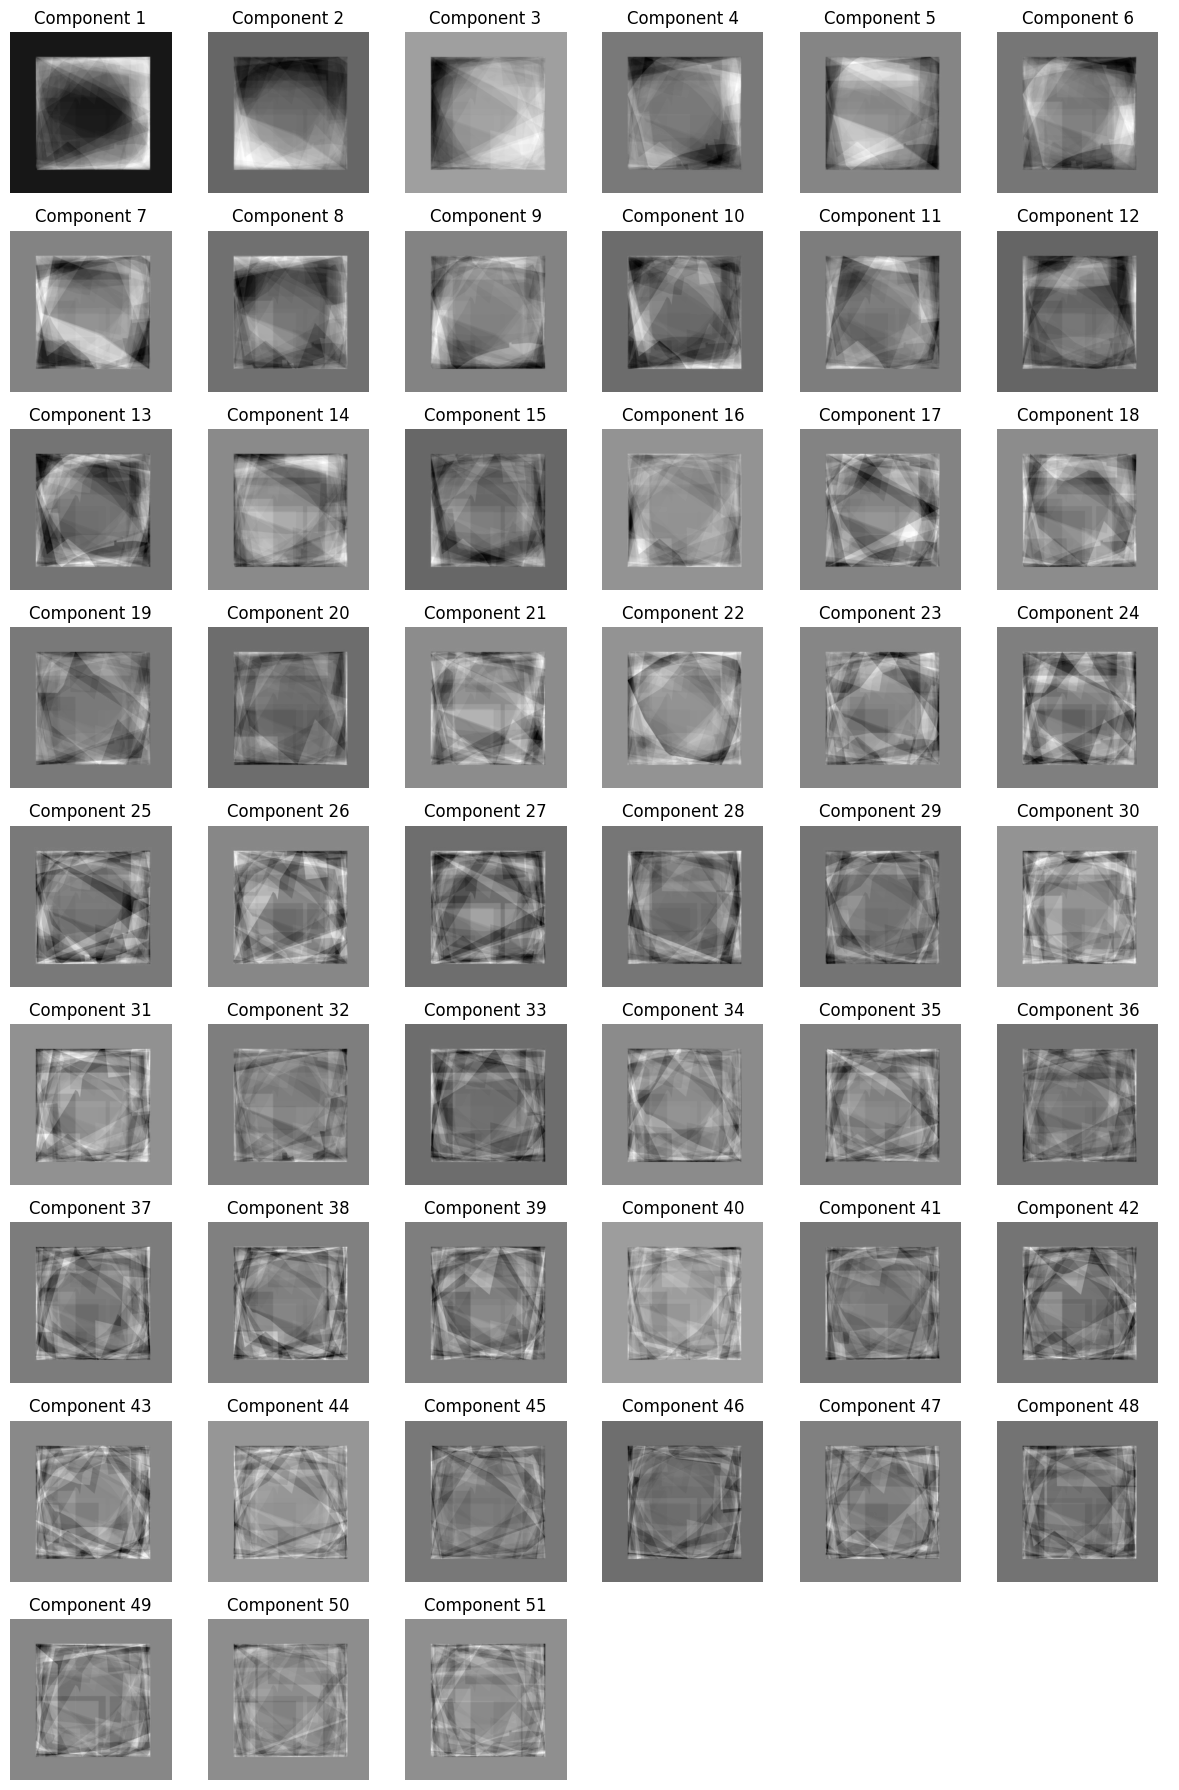

In [ ]:
def load_and_flatten_images(folder_path, image_size=(400, 400)):
    images = []
    for filename in os.listdir(folder_path):
        with Image.open(os.path.join(folder_path, filename)) as img:
            # Convert the image to grayscale and resize it
            img = img.convert('L').resize(image_size)
            # Flatten the image to create a 1D array
            img_flattened = np.array(img).flatten()
            images.append(img_flattened)
    return np.array(images)

def perform_pca(images, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold)
    pca.fit(images)
    print(f"Number of components to explain {variance_threshold*100}% of variance: {pca.n_components_}")
    return pca

def plot_explained_variance(pca):
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Components')
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.axvline(x=pca.n_components_, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

def plot_principal_components(pca, image_shape):
    num_components = pca.n_components_
    cols = 6  # Adjust the number of columns based on display preferences
    rows = (num_components + cols - 1) // cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    for i, ax in enumerate(axes.flat):
        if i < num_components:
            ax.imshow(pca.components_[i].reshape(image_shape), cmap='gray')
            ax.set_title(f"Component {i+1}")
            ax.axis('off')
        else:
            ax.axis('off')  # Turn off axis for empty subplots
    plt.tight_layout()
    plt.show()

def main():
    folder_path = 'dataset'  # Change this path to your image folder
    image_size = (400, 400)  # Adjust this size as needed based on your images
    images = load_and_flatten_images(folder_path, image_size)
    pca = perform_pca(images)
    plot_explained_variance(pca)
    plot_principal_components(pca, image_size)

if __name__ == "__main__":
    main()


Number of components to explain 95.0% of variance: 51


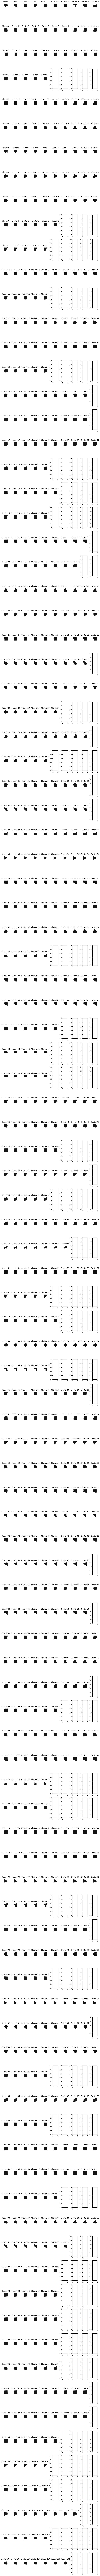

In [ ]:

def load_and_flatten_images(folder_path, image_size=(400, 400)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            with Image.open(os.path.join(folder_path, filename)) as img:
                img = img.convert('L').resize(image_size)
                img_flattened = np.array(img).flatten()
                images.append(img_flattened)
    return np.array(images)

def perform_pca(images, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold)
    components = pca.fit_transform(images)
    print(f"Number of components to explain {variance_threshold*100}% of variance: {pca.n_components_}")
    return components, pca

def apply_dbscan(components, eps=30, min_samples=5):
    clustering = DBSCAN(eps=eps, min_samples=min_samples)
    labels = clustering.fit_predict(components)
    return labels

def visualize_clusters(images, labels, image_size):
    unique_labels = np.unique(labels)
    fig, axs = plt.subplots(len(unique_labels), 10, figsize=(10, len(unique_labels)*2.5))
    for ax_row, label in zip(axs, unique_labels):
        cluster_indices = np.where(labels == label)[0]
        for ax, idx in zip(ax_row, cluster_indices[:10]):
            ax.imshow(images[idx].reshape(image_size), cmap='gray')
            ax.set_title(f"Cluster {label}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    folder_path = 'dataset'  # Specify your image folder path
    image_size = (400, 400)  # Define the image size
    images = load_and_flatten_images(folder_path, image_size)
    components, pca = perform_pca(images)
    labels = apply_dbscan(components)
    visualize_clusters(images, labels, image_size)

if __name__ == "__main__":
    main()



DB Scan Reveales that there are actual 104 different types of Geometry Present


Number of components to explain 95.0% of variance: 51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


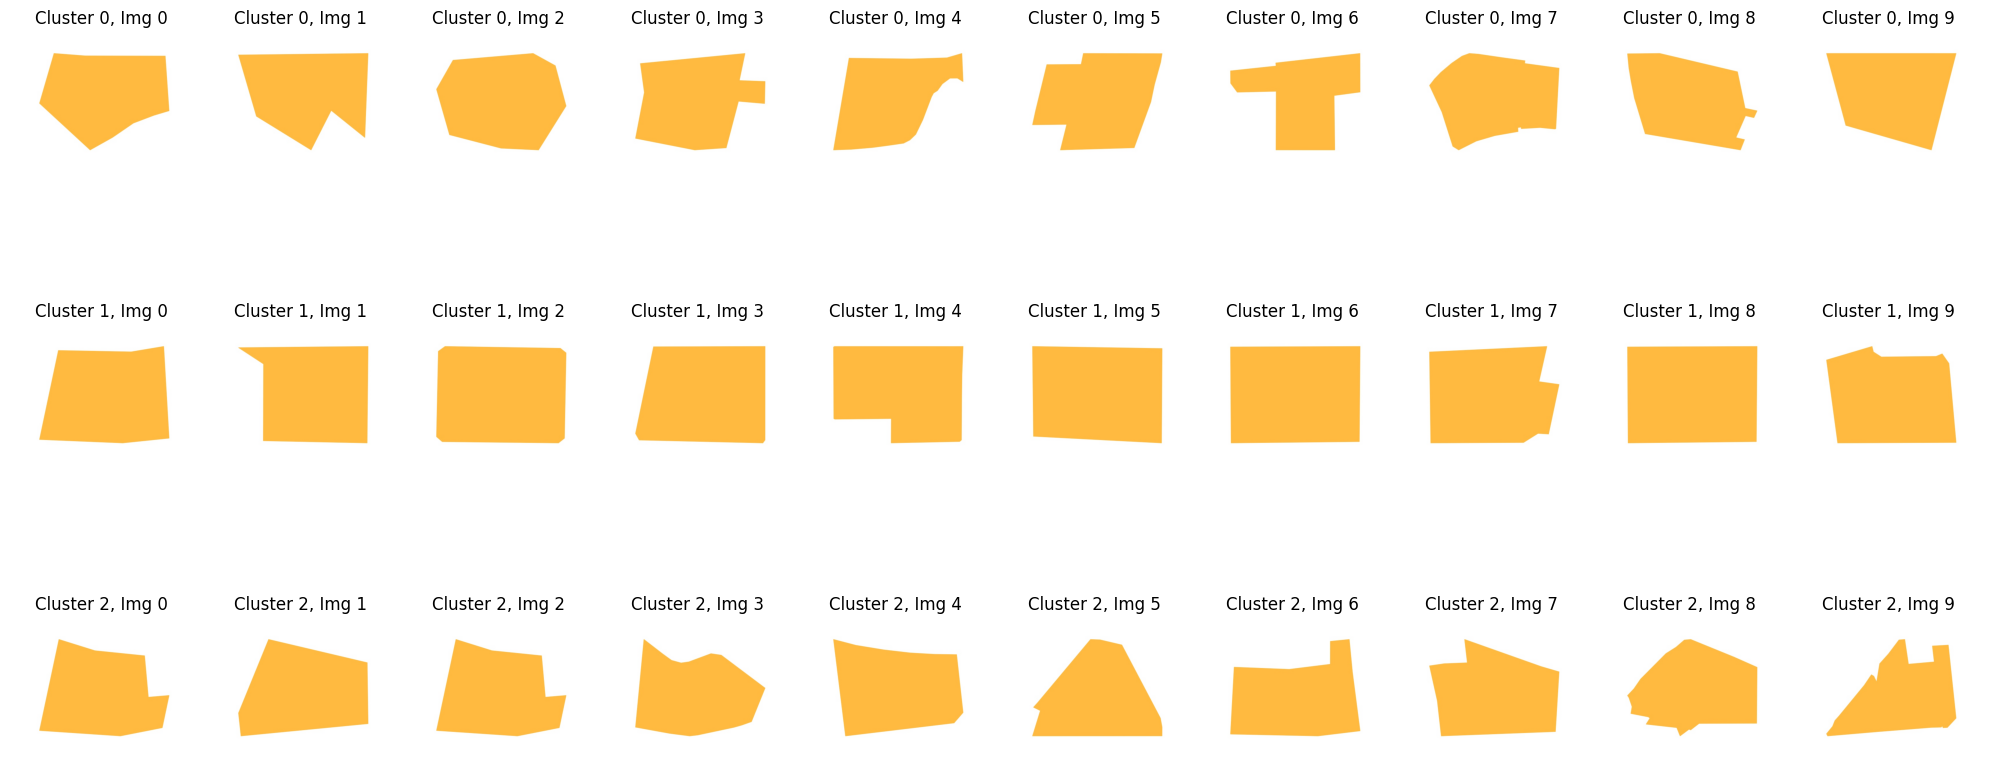

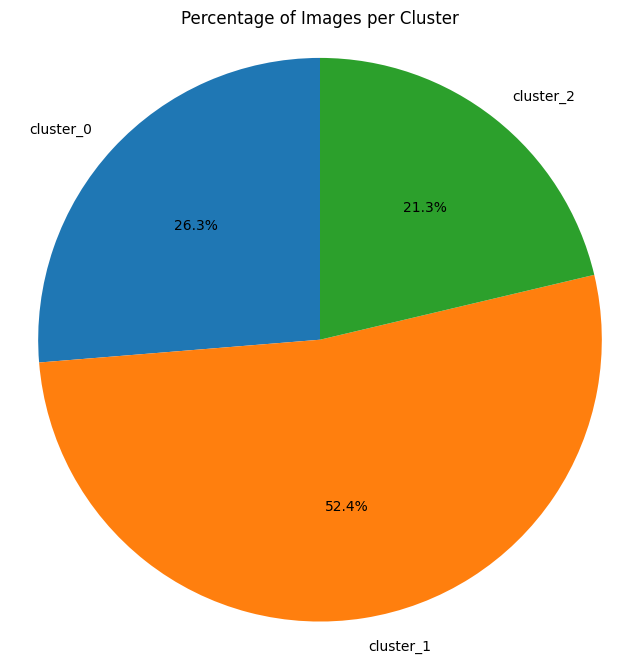

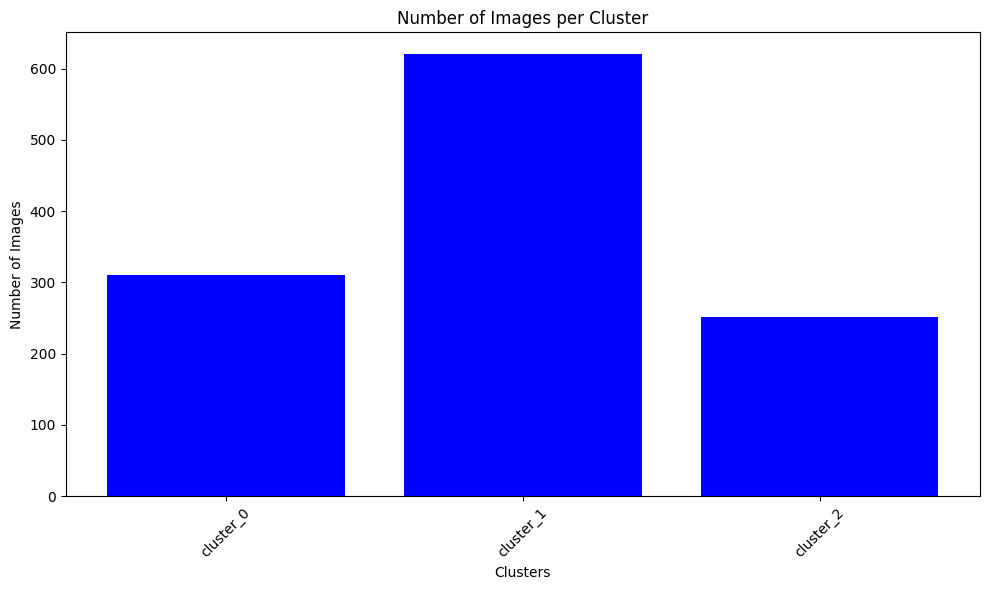

In [ ]:


def load_and_flatten_images(folder_path, image_size=(400, 400)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        with Image.open(os.path.join(folder_path, filename)) as img:
            img = img.convert('L').resize(image_size)
            img_flattened = np.array(img).flatten()
            images.append(img_flattened)
            filenames.append(filename)
    return np.array(images), filenames

def perform_pca(images, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold)
    transformed_images = pca.fit_transform(images)
    print(f"Number of components to explain {variance_threshold*100}% of variance: {pca.n_components_}")
    return transformed_images, pca

def cluster_images(transformed_images, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(transformed_images)
    return labels

def save_clustered_images(labels, filenames, original_folder, base_folder='clustered_images'):
    if os.path.exists(base_folder):
        shutil.rmtree(base_folder)
    os.makedirs(base_folder)

    for i in range(max(labels) + 1):
        os.makedirs(os.path.join(base_folder, f'cluster_{i}'))

    for label, filename in zip(labels, filenames):
        src = os.path.join(original_folder, filename)
        dst = os.path.join(base_folder, f'cluster_{label}', filename)
        shutil.copy(src, dst)

def plot_sample_images(base_folder, n_clusters=3, samples_per_cluster=10):
    fig, axs = plt.subplots(n_clusters, samples_per_cluster, figsize=(20, 10))
    for i in range(n_clusters):
        folder = os.path.join(base_folder, f'cluster_{i}')
        images = os.listdir(folder)[:samples_per_cluster]
        for j, img in enumerate(images):
            img_path = os.path.join(folder, img)
            image = Image.open(img_path)
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(f'Cluster {i}, Img {j}')
    plt.tight_layout()
    plt.show()


import os
import matplotlib.pyplot as plt

def count_images_in_clusters(clustered_images_dir):
    cluster_counts = {}
    for cluster_name in os.listdir(clustered_images_dir):
        cluster_path = os.path.join(clustered_images_dir, cluster_name)
        if os.path.isdir(cluster_path):
            cluster_counts[cluster_name] = len(os.listdir(cluster_path))
    return cluster_counts

def plot_pie_chart(cluster_counts):
    labels = list(cluster_counts.keys())
    sizes = list(cluster_counts.values())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Images per Cluster')
    plt.show()

def plot_bar_chart(cluster_counts):
    labels = list(cluster_counts.keys())
    sizes = list(cluster_counts.values())
    plt.figure(figsize=(10, 6))
    plt.bar(labels, sizes, color='blue')
    plt.xlabel('Clusters')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



def main():
    folder_path = 'dataset'  # Change this path to your image folder
    image_size = (400, 400)  # Adjust this size as needed based on your images
    images, filenames = load_and_flatten_images(folder_path, image_size)
    transformed_images, pca = perform_pca(images)
    labels = cluster_images(transformed_images, n_clusters=3)
    save_clustered_images(labels, filenames, folder_path)
    plot_sample_images('clustered_images', n_clusters=3, samples_per_cluster=10)
    clustered_images_dir = 'clustered_images'  # Path to the clustered images directory
    cluster_counts = count_images_in_clusters(clustered_images_dir)
    plot_pie_chart(cluster_counts)
    plot_bar_chart(cluster_counts)

if __name__ == "__main__":
    main()


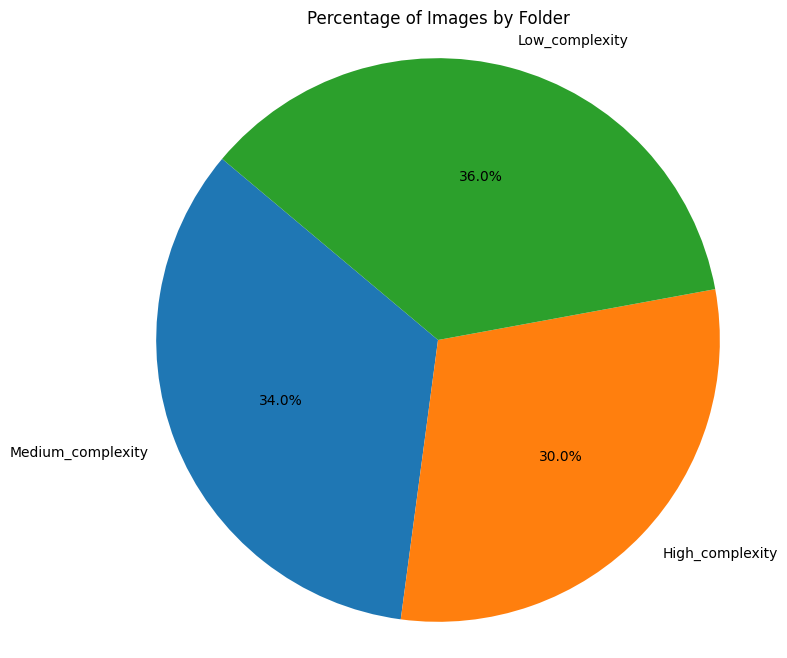

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    """Counts image files in the specified folder."""
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])

def plot_pie_chart(data, labels):
    """Plots a pie chart with the given data and labels."""
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Images by Folder')
    plt.show()

def main():
    main_folder = 'Labelled_Dataset'
    subfolders = [f.path for f in os.scandir(main_folder) if f.is_dir()]
    image_counts = []
    folder_names = []

    for folder in subfolders:
        count = count_images_in_folder(folder)
        image_counts.append(count)
        folder_names.append(os.path.basename(folder))

    total_images = sum(image_counts)
    if total_images > 0:
        percentages = [(count / total_images) * 100 for count in image_counts]
        plot_pie_chart(percentages, folder_names)
    else:
        print("No images found in any subfolder.")

if __name__ == "__main__":
    main()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = 'Labelled_Dataset'

# Create ImageDataGenerators for training and validation (and optionally test)
train_datagen = ImageDataGenerator(
    rescale=1./255,    # Scale the image between 0 and 1
    rotation_range=40, # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,   # Shear transformations
    zoom_range=0.2,    # Random zoom
    horizontal_flip=True, # Random horizontal flips
    fill_mode='nearest', # Strategy to fill newly created pixels
    validation_split=0.2 # Split percentage for validation set
)

# Prepare iterators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224), # Match the input size of the model
    batch_size=32,
    class_mode='categorical', # Multiclass classification
    subset='training' # Specify this is training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Specify this is validation data
)


Found 161 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0

# Load pre-trained EfficientNetB0 without the top layer to allow for custom classification layers
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Set the entire base model to be trainable
base_model.trainable = True

# Create the classification model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # This will now correctly operate on 4D output from EfficientNetB0
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 4213926 (16.07 MB)
Trainable params: 417

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the ModelCheckpoint callback to save only the best model based on validation loss
checkpoint = ModelCheckpoint(
    'my_best_efficientnet_model.h5',  # path where the model is saved
    monitor='val_loss',               # metric to monitor
    save_best_only=True,              # save only the best model
    mode='min',                       # 'min' because we want to minimize the loss
    verbose=1                         # print out messages when saving the model
)

# Fit the model using the training and validation generators
history = model.fit(
    train_generator,
    epochs=250,
    validation_data=validation_generator,
    callbacks=[checkpoint]            # include the ModelCheckpoint in the callbacks
)

# Save the training history
np.save('my_model_history.npy', history.history)


Epoch 1/250
6/6 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.5155
Epoch 1: val_loss improved from inf to 1.19464, saving model to my_best_efficientnet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 38s 901ms/step - loss: 0.9734 - accuracy: 0.5155 - val_loss: 1.1946 - val_accuracy: 0.3333
Epoch 2/250
6/6 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.5839
Epoch 2: val_loss improved from 1.19464 to 1.17257, saving model to my_best_efficientnet_model.h5
6/6 [==============================] - 4s 625ms/step - loss: 0.8446 - accuracy: 0.5839 - val_loss: 1.1726 - val_accuracy: 0.3333
Epoch 3/250
6/6 [==============================] - ETA: 0s - loss: 0.6340 - accuracy: 0.7143
Epoch 3: val_loss did not improve from 1.17257
6/6 [==============================] - 3s 477ms/step - loss: 0.6340 - accuracy: 0.7143 - val_loss: 1.2854 - val_accuracy: 0.3590
Epoch 4/250
6/6 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7391
Epoch 4: val_loss did not improve from 1.17257
6/6 [==============================] - 3s 528ms/step - loss: 0.5651 - accuracy: 0.7391 - val_loss: 1.6670 - val_accuracy: 0.3590
Epoch 5/250


In [ ]:
# Save the model
model.save('my_model.h5')

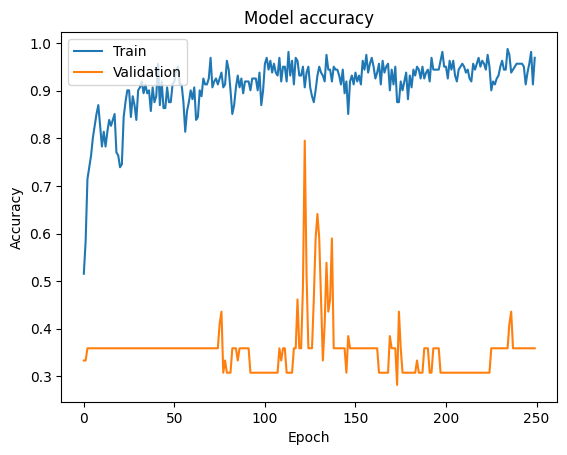

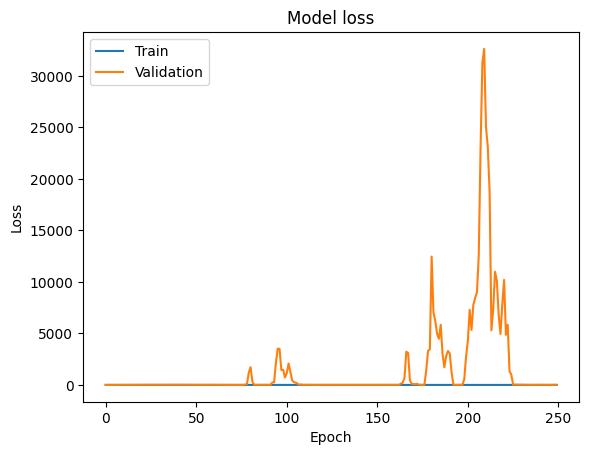

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


2/2 [==============================] - 2s 103ms/step


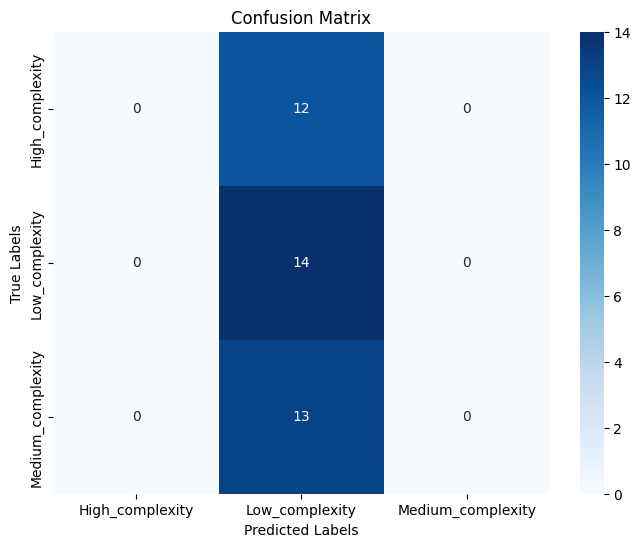

In [ ]:
import numpy as np

# Predict the labels for validation set
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
true_classes = true_classes[:len(predicted_classes)]  # Adjust size if needed due to batch cut-off
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(len(validation_generator.class_indices)))
import matplotlib.pyplot as plt
import seaborn as sns

# Labels from the generator class indices
labels = list(validation_generator.class_indices.keys())

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


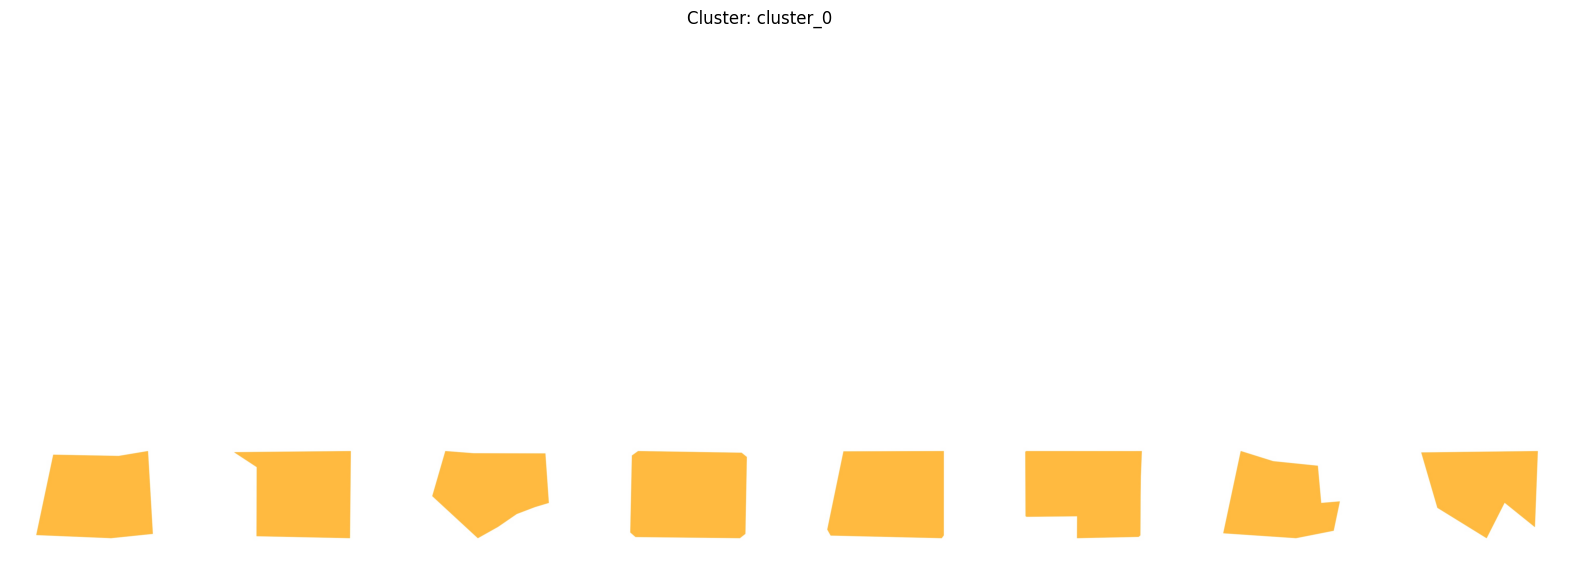

In [ ]:
import os
import cv2
import numpy as np
import shutil
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_hu_moments(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    moments = [cv2.moments(cnt) for cnt in contours if cv2.contourArea(cnt) > 100]
    hu_moments = [cv2.HuMoments(m).flatten() for m in moments if m['m00'] != 0]
    return np.log(np.abs(np.concatenate(hu_moments)) + 1e-5) if hu_moments else np.zeros(7)  # Log transform

def process_images_from_folder(folder_path):
    data = []
    filenames = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and os.path.isfile(file_path):
            hu_moments = calculate_hu_moments(file_path)
            if hu_moments is not None:
                data.append(hu_moments)
                filenames.append(file_path)
    return np.array(data), filenames

def cluster_images(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

def save_clustered_images(filenames, labels, base_directory):
    for i in range(max(labels) + 1):
        cluster_path = os.path.join(base_directory, f"cluster_{i}")
        os.makedirs(cluster_path, exist_ok=True)
        for filename, label in zip(filenames, labels):
            if label == i:
                shutil.copy(filename, cluster_path)

def visualize_clusters(base_directory):
    cluster_dirs = [os.path.join(base_directory, d) for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
    for cluster_dir in cluster_dirs:
        image_files = [os.path.join(cluster_dir, f) for f in os.listdir(cluster_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
        plt.figure(figsize=(20, 10))
        for i, img_path in enumerate(image_files[:8]):  # Show up to 8 images per cluster
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            plt.subplot(1, min(len(image_files), 8), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f'Cluster: {os.path.basename(cluster_dir)}')
        plt.show()

# Usage
image_folder = 'dataset'
cluster_base_dir = 'Hu_clustered_images'  # Update this path as necessary
data, filenames = process_images_from_folder(image_folder)
labels = cluster_images(data)
save_clustered_images(filenames, labels, cluster_base_dir)
visualize_clusters(cluster_base_dir)


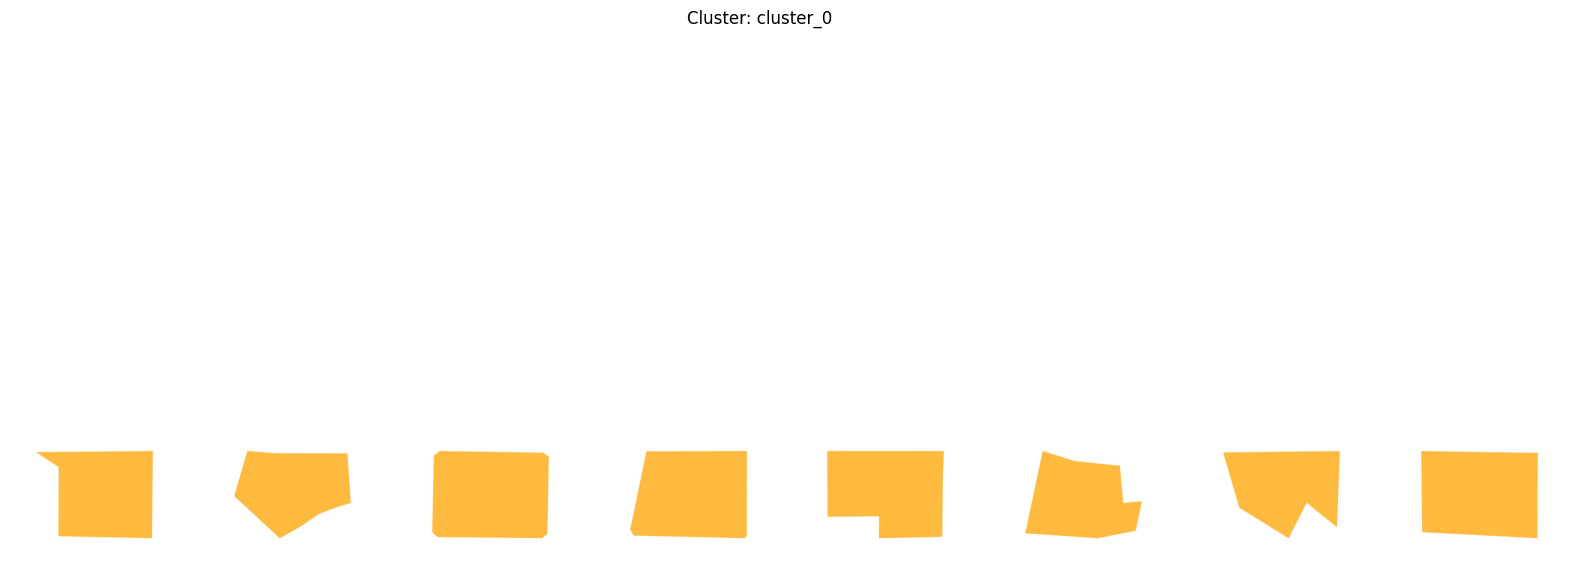

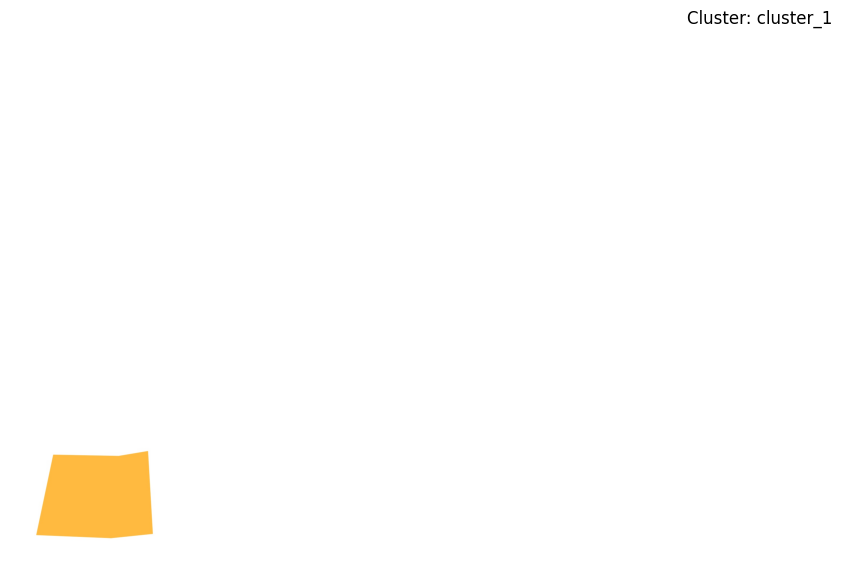

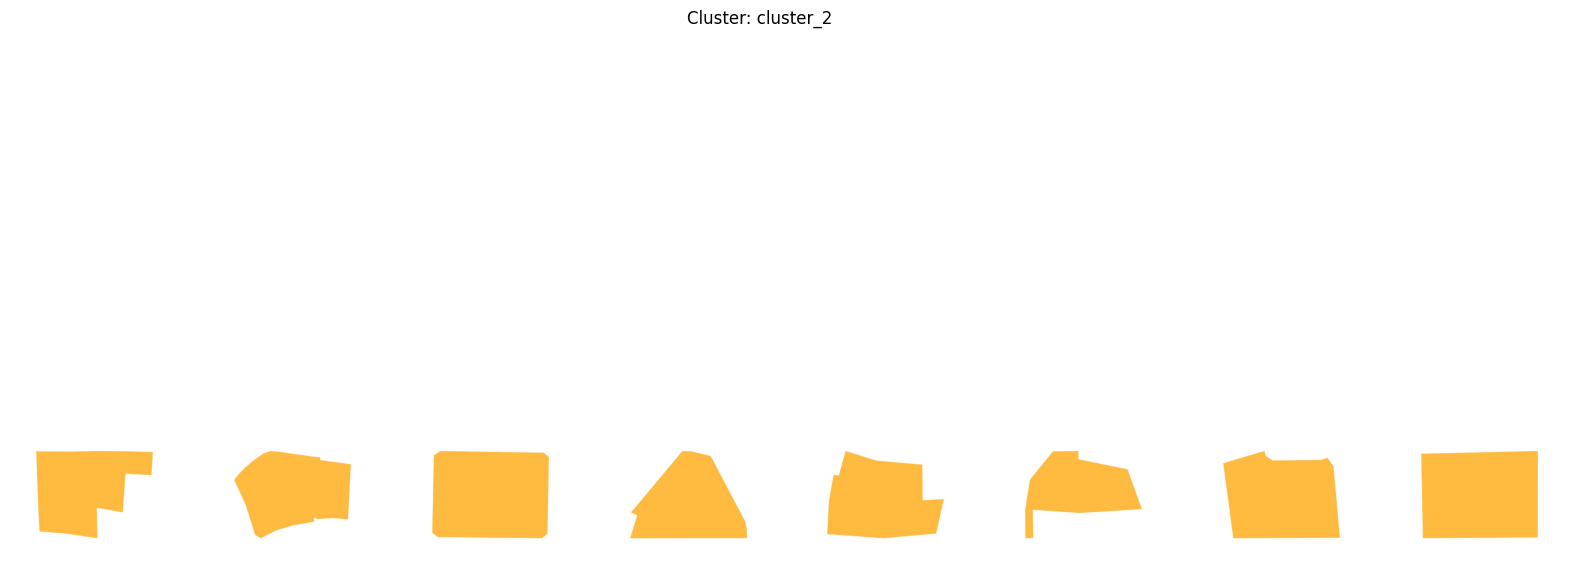

In [ ]:
import os
import cv2
import numpy as np
import shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def calculate_extended_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None  # Image could not be loaded
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    features = []
    if contours:
        contour = max(contours, key=cv2.contourArea)
        moments = cv2.moments(contour)
        hu_moments = cv2.HuMoments(moments).flatten()
        hu_moments = np.log(np.abs(hu_moments) + 1e-5)  # Normalize using logarithmic scale
        features.extend(hu_moments)

        # Add additional features like area, perimeter, etc.
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        rect = cv2.minAreaRect(contour)
        width, height = rect[1]
        aspect_ratio = width / height if height != 0 else 0
        features.extend([area, perimeter, aspect_ratio])

    if len(features) < 100:
        features.extend([0] * (100 - len(features)))  # Pad with zeros if less than 100 features

    return features[:100]  # Ensure only first 100 features are used

def load_images_and_compute_features(folder_path):
    feature_vectors = []
    file_paths = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and os.path.isfile(file_path):
            features = calculate_extended_features(file_path)
            if features is not None:
                feature_vectors.append(features)
                file_paths.append(file_path)
    return feature_vectors, file_paths

def apply_pca(features, variance=0.95):
    pca = PCA(n_components=variance)
    principal_components = pca.fit_transform(features)
    return principal_components

def cluster_images(principal_components, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=55, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(principal_components)
    return labels

def organize_images_by_cluster(file_paths, labels, base_directory):
    cluster_folders = []
    for i in range(max(labels) + 1):
        cluster_path = os.path.join(base_directory, f"cluster_{i}")
        os.makedirs(cluster_path, exist_ok=True)
        cluster_folders.append(cluster_path)

    for file_path, label in zip(file_paths, labels):
        shutil.copy(file_path, os.path.join(cluster_folders[label], os.path.basename(file_path)))

def display_cluster_images(base_directory):
    for cluster_dir in os.listdir(base_directory):
        cluster_path = os.path.join(base_directory, cluster_dir)
        image_files = [os.path.join(cluster_path, f) for f in os.listdir(cluster_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        plt.figure(figsize=(20, 10))
        for i, img_path in enumerate(image_files[:8]):  # Display up to 8 images per cluster
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            plt.subplot(1, 8, i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f'Cluster: {cluster_dir}')
        plt.show()

# Main Usage
image_folder = 'dataset'
cluster_base_dir = 'clustered_images_PCA_Extended'
feature_vectors, file_paths = load_images_and_compute_features(image_folder)
if feature_vectors:
    principal_components = apply_pca(feature_vectors)
    labels = cluster_images(principal_components)
    organize_images_by_cluster(file_paths, labels, cluster_base_dir)
    display_cluster_images(cluster_base_dir)
else:
    print("No valid images found or processed.")


NameError: name 'hu_vectors' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

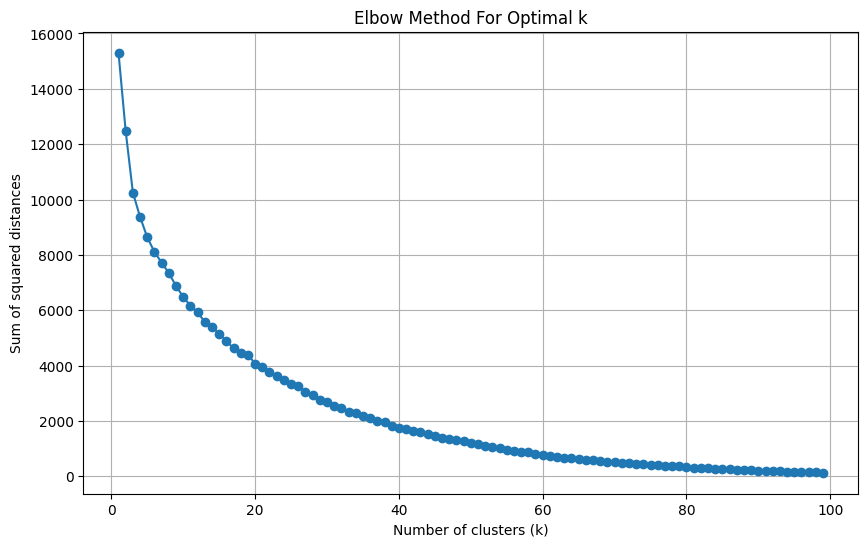

In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Step 1: Load images
def load_images_from_folder(folder, target_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            img = rgb2gray(img)  # Convert to grayscale
            img = resize(img, target_size)  # Resize image
            images.append(img.flatten())  # Flatten the image
    return np.array(images)

# Step 2: Load dataset
folder = "dataset"
data = load_images_from_folder(folder)

# Step 3: Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
data_transformed = pca.fit_transform(data)

# Step 4: Apply k-means clustering and use the Elbow method
sse = []
k_range = range(1, 100)  # Example range, can be changed based on the dataset size
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

# Step 5: Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()
